# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 6: Cellular Automaton
## 04.28.2019

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from scipy import stats
import time
import random
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
sns.set_style(style='white')
seaborn_cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

In [236]:
def mode_choose(boundary_condition, game_mode):
    
    current_mode = ('..\\Release\\cell.exe' + ' ' +
                    boundary_condition + ' ' +
                    game_mode + ' ' +
                    str(gen_neighbours) + ' ' +
                    str(width_arena) + ' ' +
                    str(height_arena) + ' ' +
                    str(position_x) + ' ' +
                    str(position_y) + ' ' +
                    str(sim_steps) + ' '
                   )

    if(game_mode == 'random'):
        current_mode += (str(width_life) + ' ' +
                         str(height_life)
                        )
        
    elif(game_mode == 'user'):
        current_mode += file_name

    else:
        print('fu')

    return(current_mode)

In [118]:
image_dpi = 150
image_format = 'pdf'
image_path = '..\\Documentation\\src\\images\\'

## Animation

In [198]:
def AnimateLife(video_name, fps):
    
    GameArena = plt.figure(figsize=(width_arena/sliced, height_arena/sliced))
    
    # INPUT DATA SHOULD BE AN ARRAY, SO WE CONVERT INTO IT FROM A LIST
    StartingPoints = np.asarray(data_cell[0:height_arena,])

    # CREATE A FULL NULL-MATRIX IN THE SIZE OF THE FULL ARRAY
    Background = np.zeros_like(StartingPoints)

    # SET ARENA AXES (FROM MATPLOTLIB.ORG)
    ax = GameArena.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

    # FROM STACKOVERFLOW, PLOTTING BINARY MATRIX WITH WHITE AND BLACK SQUARES
    # ON STACKOVERFLOW IT WAS AN EXAMPLE FOR ANIMATING A FRACTAL
    Image = ax.imshow(StartingPoints, cmap='Greys', interpolation='nearest')

    # WE SHOULD INITIALIZE THE PLOTTING ANIMATION WITH A BACKGROUND FIRST IN MATPLOTLIB'S FuncAnimation
    # THIS IS NECESSARY, BECAUSE THE ANIMATION WOULD ONLY SHOW ONLY ONE FRAME, AND WE DON'T WANT IT
    # THIS IS FROM THE EXAMPLE CODES FROM MATPLOTLIB'S OFFICIAL PAGE
    def InitFunc():
        Image.set_data(Background)
        return Image,

    # STEPPING THE LIFE AND UPDATING THE IMAGE
    def GenerationUpdate(x):
        Image.set_data(GenerationUpdate.StartingPoints)
        GenerationUpdate.StartingPoints = np.asarray(data_cell[height_arena*x:height_arena*(x + 1),])
        return Image,

    # SET UP FORMATTING FOR MOVIE FILES FROM MATPLOTLIB'T HOME PAGE
    # FFMPEG NEEDED!!!
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=fps, metadata=dict(artist='PB'), bitrate=1800)

    # ANIMATE THE OBJECT
    GenerationUpdate.StartingPoints = StartingPoints
    anim = animation.FuncAnimation(GameArena, GenerationUpdate, sim_steps, interval=50, init_func=InitFunc, blit=True)
    anim.save('.\\videos\\' + video_name + '.mp4', writer=writer)
    plt.show()

## Draw image

In [5]:
input_image = plt.imread('cica.bmp')/255

In [6]:
h = input_image.shape[0]
w = input_image.shape[1]
new_array = np.zeros((h, w))
for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
        new_array[i][j] = 1 - input_image[i,j,][0]

In [11]:
print(h, ',', w)

50 , 50


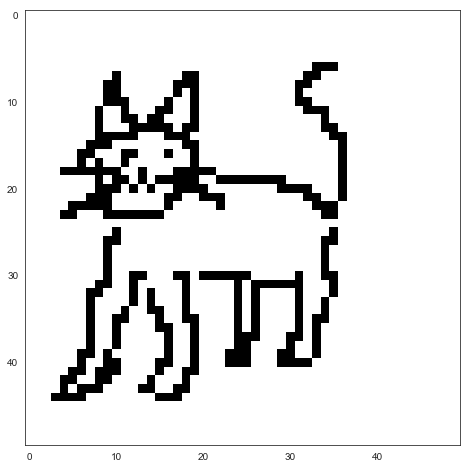

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(new_array, cmap='Greys')
plt.show()

In [23]:
np.savetxt('..\\Release\\cica.txt', X=new_array, fmt='%1.0f', delimiter=',')

## Initial conditions

In [281]:
# Exact number of neighbours to generate new cell (N)
gen_neighbours = 2
# Width of the game arena [pixels]
# galaxy: 35x35, placed 5-5, run 63
# copperhead: 20x40, placed 5-20, run 400
# glider gun: 50x30, placed 5-5, run 400
width_arena = 50
# Height of the game arena [pixels]
height_arena = 30
# Position of random life at start along X axis
position_x = 5
# Position of random life at start along Y axis
position_y = 5
# Total number of simulated steps
sim_steps = 400
# Width of the random life [pixels]
width_life = 3
# Height of the random life [pixels]
height_life = 3
# Input file's name
file_name = '\"E:\\Documents\\GitHub\\ELTE_Comp_Simulations_2019\\VI. Cellular Automaton\\Release\\glidergun.dat\"'
#file_name = '\"C:\\Users\\masterdesky\\Documents\\GitHub\\ELTE_Comp_Simulations_2019\\VI. Cellular Automaton\\Release\\cica.txt\"'
sliced = 4

In [282]:
current_mode = mode_choose(boundary_condition = 'periodic', game_mode = 'user')
os.system(current_mode)
print('sent command: {0}'.format(current_mode))
data_cell = np.genfromtxt('cell.dat')

sent command: ..\Release\cell.exe periodic user 2 50 30 5 5 400 "E:\Documents\GitHub\ELTE_Comp_Simulations_2019\VI. Cellular Automaton\Release\glidergun.dat"


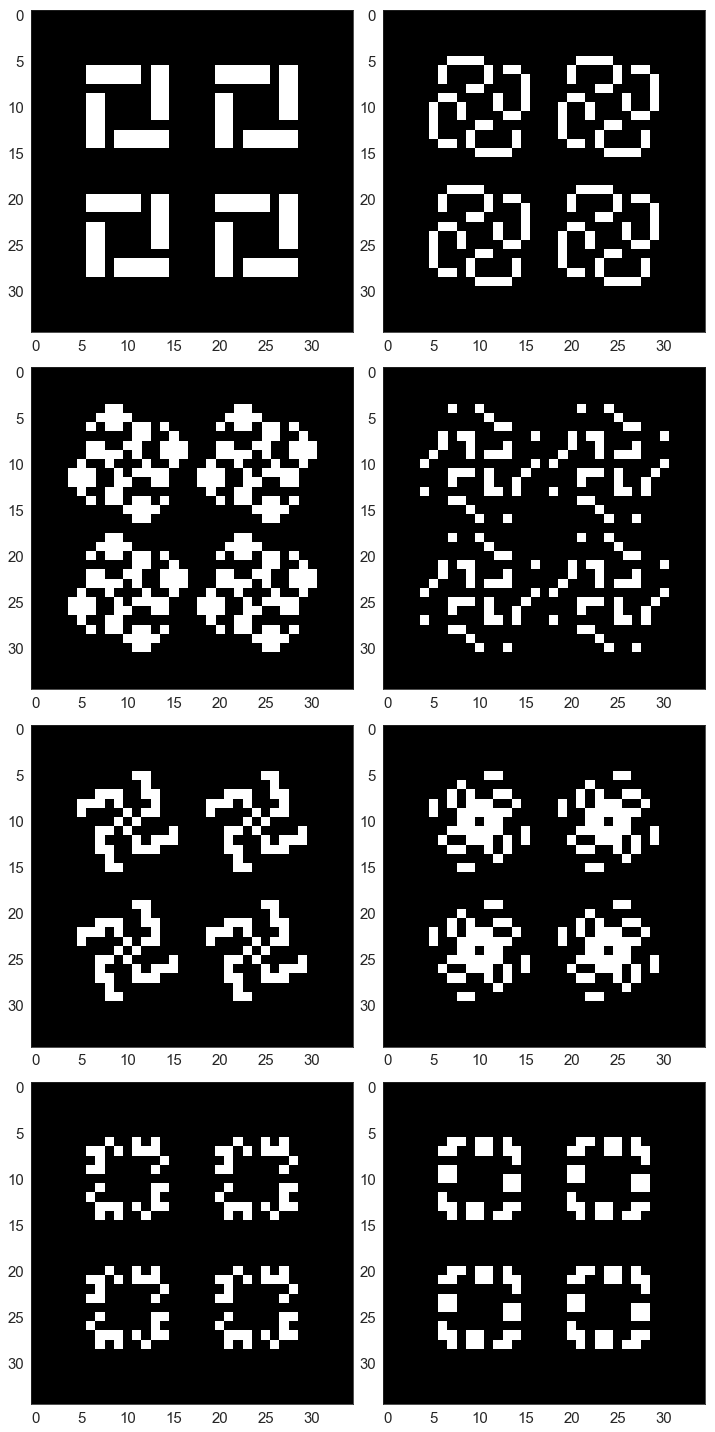

In [273]:
# galaxy
nrows = 4
ncols = 2
size = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*size, nrows*size))

axisticksize = 15

start = 2
for i in range(0, 8):
    axes[i//ncols][i%ncols].imshow(data_cell[height_arena*(i+start):height_arena*(i+start+1)], cmap='Greys_r')
    
    axes[i//ncols][i%ncols].tick_params(axis='both', which='major', labelsize=axisticksize)
    
fig.tight_layout()
plt.savefig(image_path +
            'galaxy.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

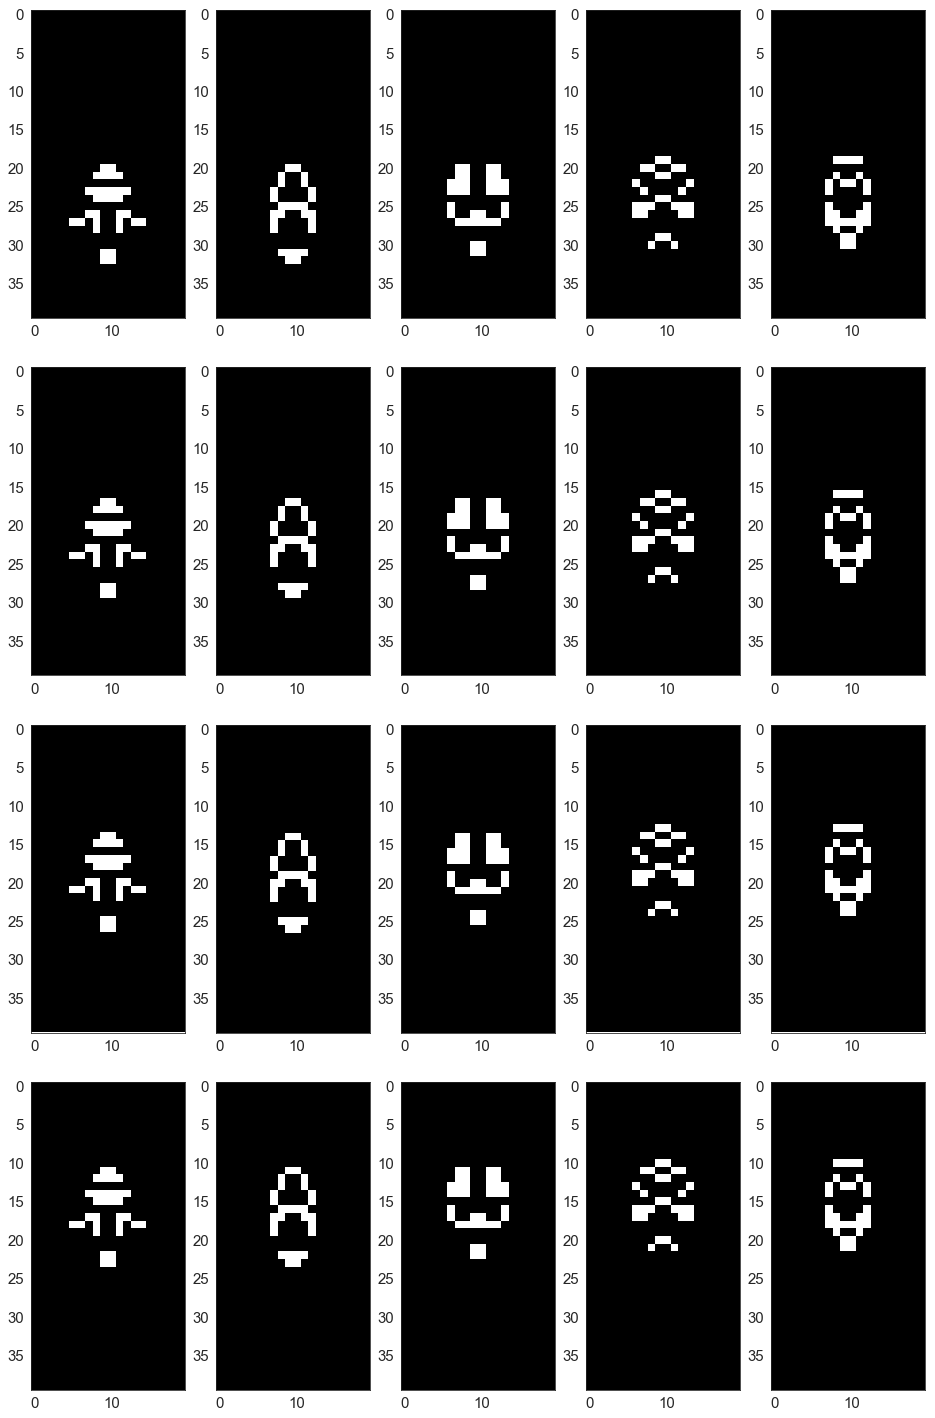

In [266]:
# copperhead
nrows = 4
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*2.6, nrows*5))

axisticksize = 15

steps = 6
start = 0
for i in range(0, nrows*ncols):
    axes[i//ncols][i%ncols].imshow(data_cell[height_arena*(steps*i+start):height_arena*(steps*i+start+1)], cmap='Greys_r')
    
    axes[i//ncols][i%ncols].tick_params(axis='both', which='major', labelsize=axisticksize)
    
fig.tight_layout()
plt.savefig(image_path +
            'copperhead.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

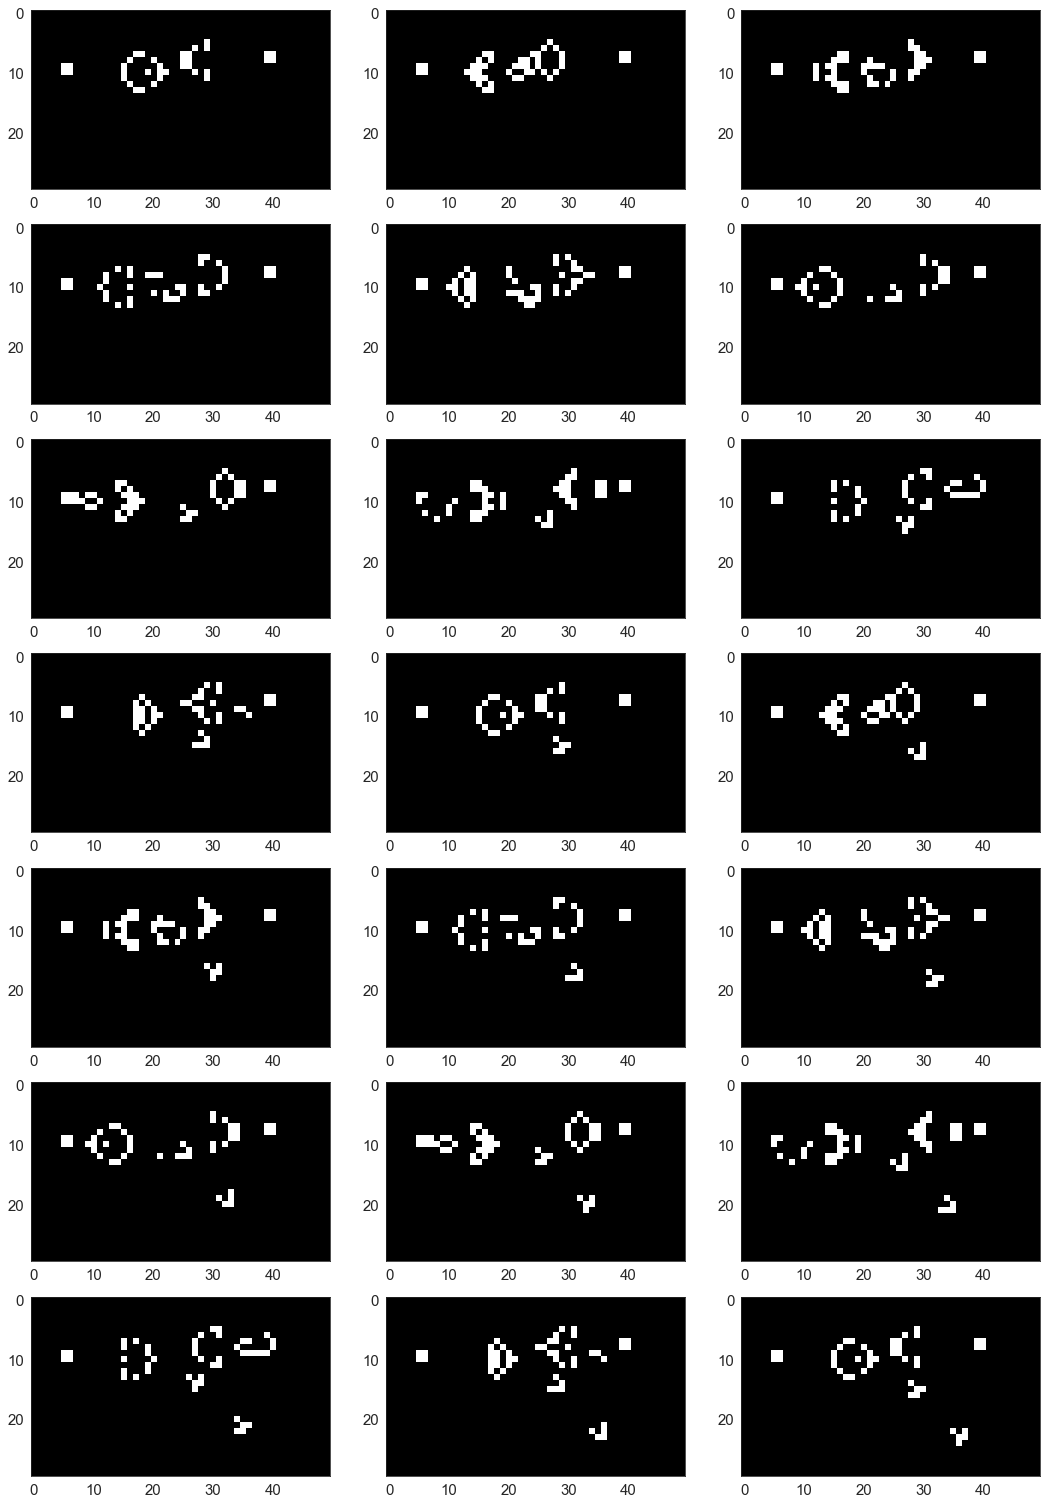

In [288]:
# glidergun
nrows = 7
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3))

axisticksize = 15

steps = 3
start = 0
for i in range(0, nrows*ncols):
    axes[i//ncols][i%ncols].imshow(data_cell[height_arena*(steps*i+start):height_arena*(steps*i+start+1)], cmap='Greys_r')
    
    axes[i//ncols][i%ncols].tick_params(axis='both', which='major', labelsize=axisticksize)
    
fig.tight_layout()
plt.savefig(image_path +
            'glidergun.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

In [152]:
'''nrows = sim_steps//sliced + 1
ncols = sliced
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width_arena/sliced, nrows*height_arena/sliced))

titlesize = 30
axisticksize = 20

for i in range(0, nrows):
    for j in range(0, ncols):
        
        if(i*ncols + j + 1 <= sim_steps):
            axes[i][j].imshow(data_cell[height_arena*(i*ncols + j):height_arena*(i*ncols + j + 1),])

            axes[i][j].set_title('Frame #{0}'.format(i*ncols + j), fontsize=titlesize)
            
            axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)

        else:
            axes[i][j].remove()

fig.tight_layout()
plt.show()''';

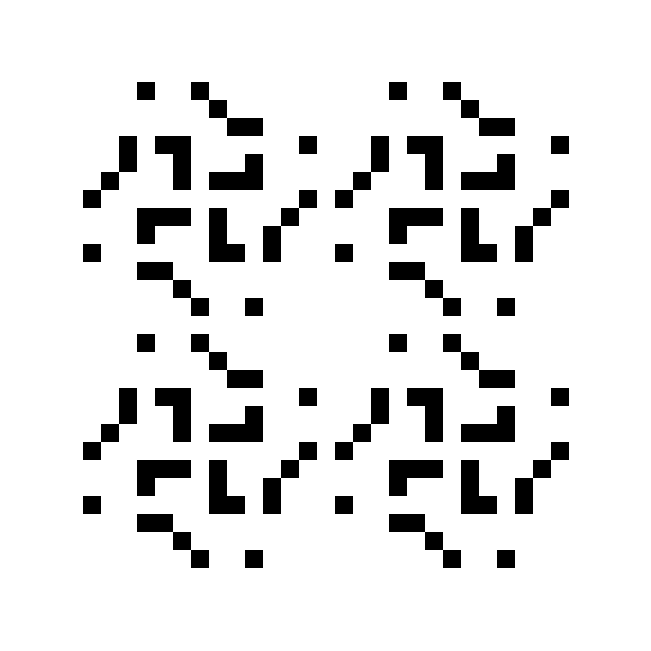

In [202]:
AnimateLife(video_name='galaxy_periodic', fps=10)

# Sand pile automaton

## Sandpile python code

In [7]:
def init_sandpile(width, height):
    
    sandpile = np.zeros((height+2, width+2))
    
    for i in range(1, height+1):
        for j in range(1, width+1):
            sandpile[i][j] = scale_factor
    
    return(sandpile)

In [8]:
def step_sandpile(sandpile, width, height):
    
    new_sandpile = sandpile
    
    for i in range(1, height+1):
        for j in range(1, width+1):
            if(sandpile[i][j] > 3):
                new_sandpile[i][j] -= 4

                # Add them to neighbours
                new_sandpile[i+1][j] += 1
                new_sandpile[i-1][j] += 1
                new_sandpile[i][j+1] += 1
                new_sandpile[i][j-1] += 1

    sandpile = new_sandpile
    
    return(sandpile)

## Animation

In [9]:
def AnimateSandpile(video_name, anim_steps):
    
    sliced = 4
    width = 50
    height = 50
    GameArena = plt.figure(figsize=(width/sliced, height/sliced))
    
    # INPUT DATA SHOULD BE AN ARRAY, SO WE CONVERT INTO IT FROM A LIST
    StartingPoints = np.asarray(init_sandpile(width, height))

    # CREATE A FULL NULL-MATRIX IN THE SIZE OF THE FULL ARRAY
    Background = np.zeros_like(StartingPoints)

    # SET ARENA AXES (FROM MATPLOTLIB.ORG)
    ax = GameArena.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

    # FROM STACKOVERFLOW, PLOTTING BINARY MATRIX WITH WHITE AND BLACK SQUARES
    # ON STACKOVERFLOW IT WAS AN EXAMPLE FOR ANIMATING A FRACTAL
    Image = ax.imshow(StartingPoints, cmap='hot', interpolation='nearest')

    # WE SHOULD INITIALIZE THE PLOTTING ANIMATION WITH A BACKGROUND FIRST IN MATPLOTLIB'S FuncAnimation
    # THIS IS NECESSARY, BECAUSE THE ANIMATION WOULD ONLY SHOW ONLY ONE FRAME, AND WE DON'T WANT IT
    # THIS IS FROM THE EXAMPLE CODES FROM MATPLOTLIB'S OFFICIAL PAGE
    def InitFunc():
        Image.set_data(Background)
        return Image,

    # STEPPING THE LIFE AND UPDATING THE IMAGE
    def GenerationUpdate(x):
        Image.set_data(GenerationUpdate.StartingPoints[1:width+1,1:height+1])
        GenerationUpdate.StartingPoints = np.asarray(step_sandpile(GenerationUpdate.StartingPoints, width, height))
        return Image,

    # SET UP FORMATTING FOR MOVIE FILES FROM MATPLOTLIB'T HOME PAGE
    # FFMPEG NEEDED!!!
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='PB'), bitrate=1800)

    # ANIMATE THE OBJECT
    GenerationUpdate.StartingPoints = StartingPoints
    anim = animation.FuncAnimation(GameArena, GenerationUpdate, anim_steps, interval=50, init_func=InitFunc, blit=True)
    anim.save('.\\videos\\' + video_name + '.mp4', writer=writer)
    plt.show()

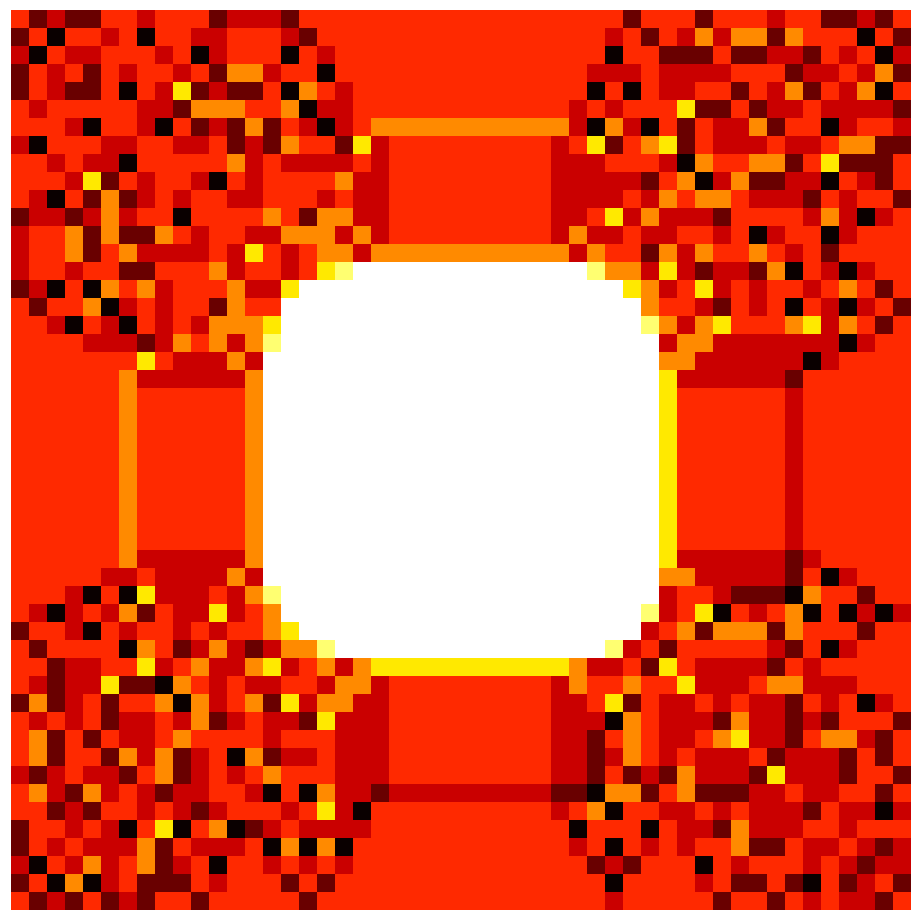

In [169]:
AnimateSandpile(video_name='sandpile_anim_py', anim_steps=400)

## C++ mode choosing

In [76]:
def mode_choose_sp(init_mode, save_mode):
    
    current_mode = ('..\\Release\\sandpile.exe' + ' ' +
                    init_mode + ' ' +
                    save_mode + ' ' +
                    str(width) + ' ' +
                    str(height) + ' ' +
                    str(sim_steps_sp) + ' ' +
                    str(scale_factor)
                   )

    return(current_mode)

## Initial conditions

In [299]:
# Whether or not save the entire run, but only the last state
save_mode = 'full'
# Width of the arena for the sandpile [pixels]
width = 60
# Height of the arena for the sandpile [pixels]
height = 100
# Maximum possible value for a slope
scale_factor = 7
# Critical degree of slope before avalanche occurs
critical_slope = 3
# Total number of simulated steps
sim_steps_sp = 60000

In [300]:
current_mode_sp = mode_choose_sp(init_mode='unstable', save_mode=save_mode)
max_steps = os.system(current_mode_sp)
print('sent command: {0}'.format(current_mode_sp))
print('stable at step {0}'.format(max_steps))

sent command: ..\Release\sandpile.exe unstable full 60 100 60000 7
stable at step 2719


In [301]:
data_cell_sp = np.genfromtxt('sandpile.dat')

In [150]:
'''sliced = 4
runs = 12
nrows = int(np.ceil(runs/sliced))
ncols = sliced
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width/sliced, nrows*height/sliced))

for i in range(0, runs):
    scale_factor = 5 + runs
    current_mode_sp = mode_choose_sp(init_mode='unstable')
    os.system(current_mode_sp)
    data_cell_sp = np.genfromtxt('sandpile.dat')

    axes[i//ncols][i%ncols].imshow(data_cell_sp[sim_steps_sp*height:(sim_steps_sp+1)*height], cmap='hot')
    
fig.tight_layout()
plt.show()''';

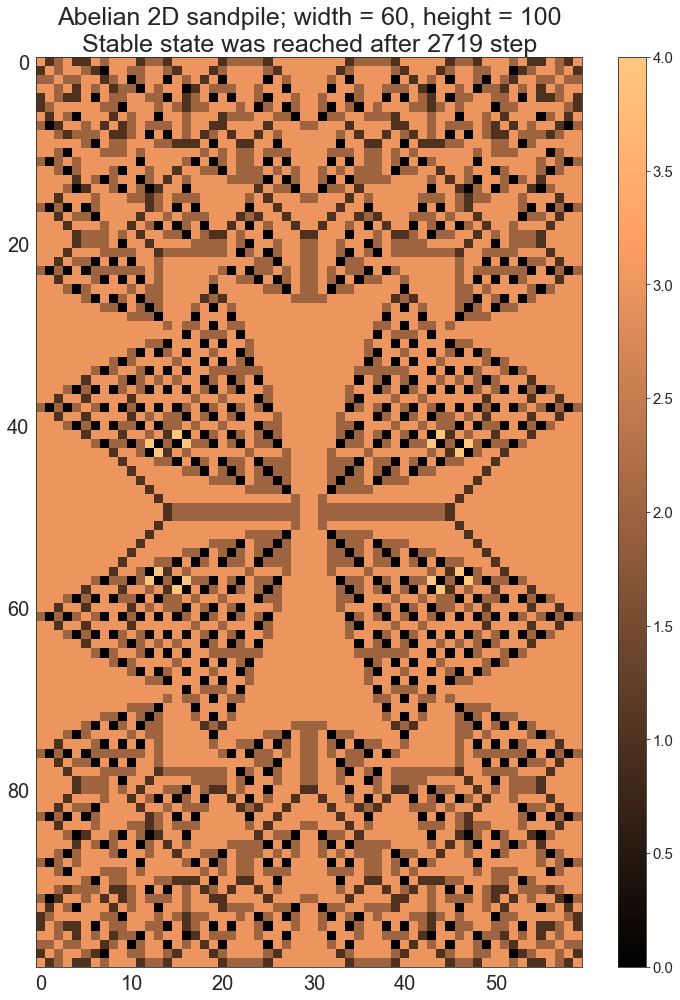

In [302]:
fig, axes = plt.subplots(figsize=(14,14))

titlesize = 25
axisticksize = 20
clbfontsize = 15

if(save_mode == 'full'):
    i = max_steps
    img = axes.imshow(data_cell_sp[(i-1)*height:i*height], cmap='copper')
else:
    img = axes.imshow(data_cell_sp, cmap='copper')

axes.set_title('Abelian 2D sandpile; width = {0}, height = {1}\nStable state was reached after {2} step'.format(width, height,
                                                                                                                max_steps),
              fontsize=titlesize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad=0.5)
cbar = plt.colorbar(img, cax=cax)
cbar.ax.tick_params(labelsize=clbfontsize)

fig.tight_layout()
plt.savefig(image_path +
            'sandpile_w' + str(width) + '_h' + str(height) + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

In [59]:
'''nrows = sim_steps_sp//sliced + 1
ncols = sliced
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width/sliced, nrows*height/sliced))

titlesize = 30
axisticksize = 20

for i in range(0, nrows):
    for j in range(0, ncols):
        
        if(i*ncols + j + 1 <= sim_steps_sp):
            axes[i][j].imshow(data_cell_sp[height*(i*ncols + j + 1):height*(i*ncols + j + 2),])

            axes[i][j].set_title('Frame #{0}'.format(i*ncols + j), fontsize=titlesize)
            
            axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)

        else:
            axes[i][j].remove()

fig.tight_layout()
plt.show()''';